# Randon Forest 연습
- 참고 :https://heytech.tistory.com/149

In [1]:
import numpy as np # 벡터, 행렬 등 수치 연산을 수행하는 선형대수 라이브러리
import pandas as pd # 시리즈, 데이터프레임 포맷 데이터 처리를 위한 라이브러리
import warnings; warnings.filterwarnings(action='ignore') # 경고 메시지 무시
import matplotlib.pyplot as plt # 데이터 시각화 라이브러리
import pickle # 객체 입출력을 위한 라이브러리
from sklearn.model_selection import train_test_split # 훈련 데이터, 테스트 데이터 분리
from sklearn.preprocessing import StandardScaler # 정규화
from sklearn.ensemble import RandomForestClassifier as RFC # 랜덤포레스트 분류 알고리즘
from sklearn.tree import DecisionTreeClassifier as DTC # 의사결정나무 분류 알고리즘
from sklearn.ensemble import GradientBoostingClassifier as GBC # 그래디언트 부스팅 분류 알고리즘
# 모델 평가를 위한 metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, plot_confusion_matrix

In [2]:
red = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
# 화이트 와인데이터셋 불러오기
white = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [4]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [6]:
red = red.drop(['quality'],axis=1)
white = white.drop(['quality'],axis=1)

In [7]:
red.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [8]:
white.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [9]:
def boxplot_vis(data, target_name):
    plt.figure(figsize=(30, 30))
    for col_idx in range(len(data.columns)):
        # 6행 2열 서브플롯에 각 feature 박스플롯 시각화
        plt.subplot(6, 2, col_idx+1)
        # flierprops: 빨간색 다이아몬드 모양으로 아웃라이어 시각화
        plt.boxplot(data[data.columns[col_idx]], flierprops = dict(markerfacecolor = 'r', marker = 'D'))
        # 그래프 타이틀: feature name
        plt.title("Feature" + "(" + target_name + "):" + data.columns[col_idx], fontsize = 20)
    plt.show()

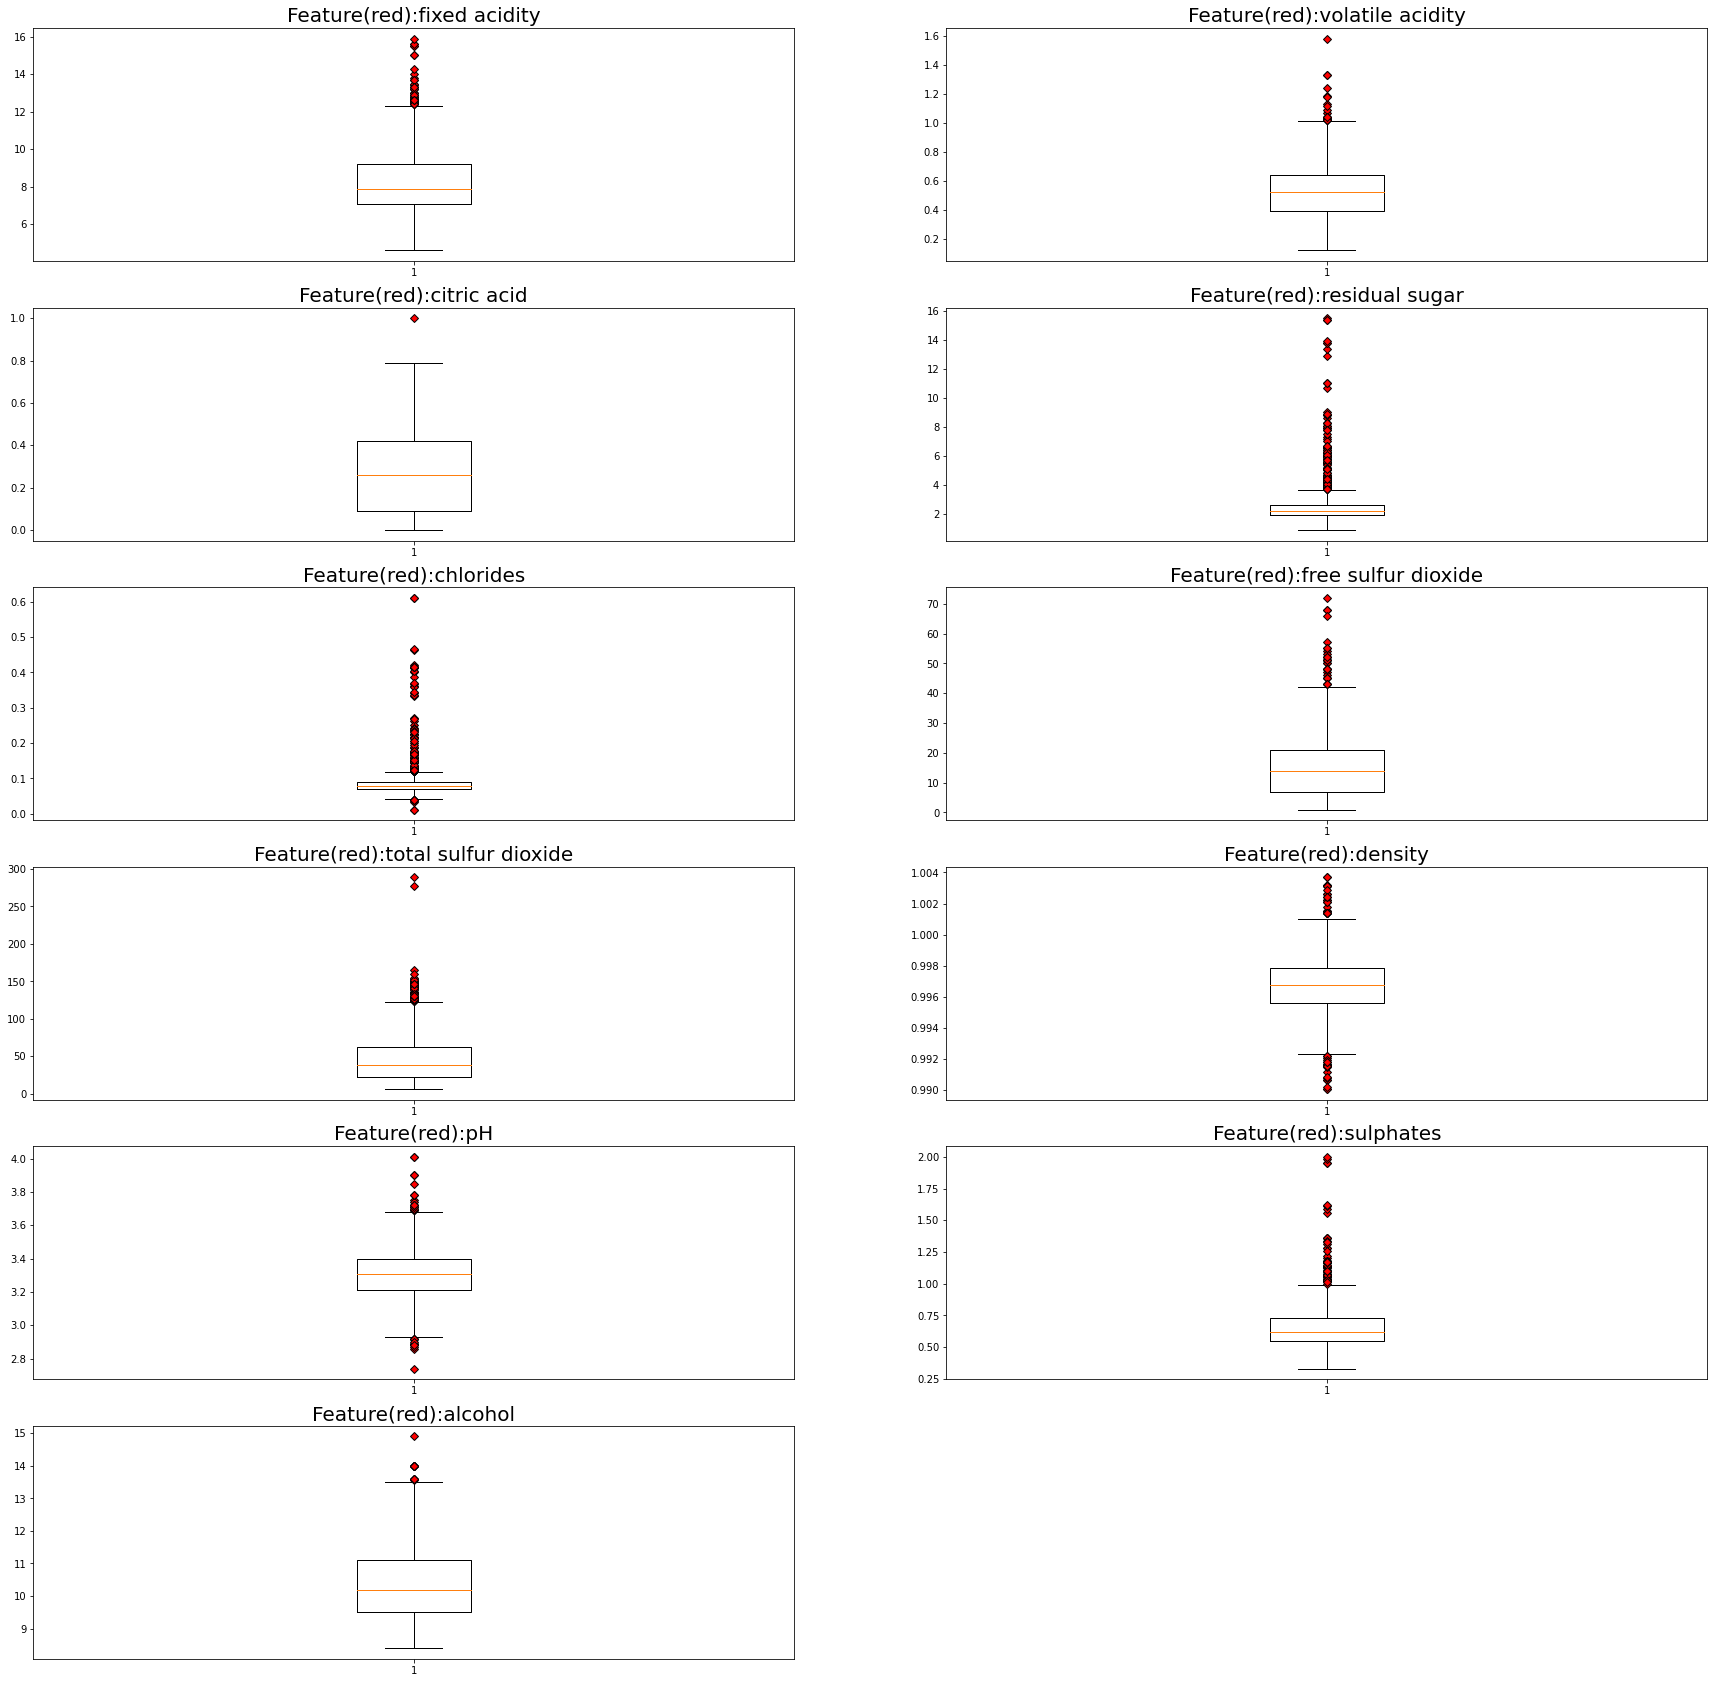

In [49]:
boxplot_vis(red,'red')

In [16]:
def remove_outlier(input_data):
    q1 = input_data.quantile(0.25) # 제 1사분위수
    q3 = input_data.quantile(0.75) # 제 3사분위수
    iqr = q3 - q1 # IQR(Interquartile range) 계산
    minimum = q1 - (iqr * 1.5) # IQR 최솟값
    maximum = q3 + (iqr * 1.5) # IQR 최댓값
    # IQR 범위 내에 있는 데이터만 산출(IQR 범위 밖의 데이터는 이상치)
    df_removed_outlier = input_data[(minimum < input_data) & (input_data < maximum)]
    return df_removed_outlier

In [17]:
#이상치 제거한 데이터 셋
red_preq = remove_outlier(red)

In [19]:
red_preq['target']=0

In [20]:
red_preq.isnull().sum()

fixed acidity            49
volatile acidity         19
citric acid               1
residual sugar          155
chlorides               112
free sulfur dioxide      33
total sulfur dioxide     58
density                  45
pH                       35
sulphates                59
alcohol                  14
target                    0
dtype: int64

In [23]:
# 이상치 포함 데이터(이상치 처리 후 NaN) 삭제
red_preq.dropna(axis = 0, how = 'any', inplace = True)
print(f"이상치 포함된 데이터 비율: {round((len(red) - len(red_preq))*100/len(red), 2)}%")

이상치 포함된 데이터 비율: 25.58%


In [31]:
# 이상치 제거한 데이터셋
white_preq = remove_outlier(white)

In [32]:
# 목표변수 할당
white_preq['target'] = 1

In [33]:
# 결측치(이상치 처리된 데이터) 확인
white_preq.isnull().sum()

fixed acidity           146
volatile acidity        186
citric acid             270
residual sugar            7
chlorides               208
free sulfur dioxide      50
total sulfur dioxide     19
density                   5
pH                       75
sulphates               124
alcohol                   0
target                    0
dtype: int64

In [71]:
# 이상치 포함 데이터(이상치 처리 후 NaN) 삭제
white_preq.dropna(axis = 0, how = 'any', inplace = True)
print(f"이상치 포함된 데이터 비율: {round((len(white) - len(white_preq))*100/len(white), 2)}%")

이상치 포함된 데이터 비율: 18.37%


In [35]:
red_preq.to_csv('red_preq.csv')
white_preq.to_csv('white_preq.csv')

In [37]:
# 레드 와인, 화이트 와인 데이터셋 병합
df = pd.concat([red_preq, white_preq], axis = 0)
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [45]:
df.to_csv('wine_combined.csv')

In [38]:
df.target.value_counts(normalize=True)

1    0.770625
0    0.229375
Name: target, dtype: float64

FileNotFoundError: [Errno 2] No such file or directory: '../figure/relationship.png'

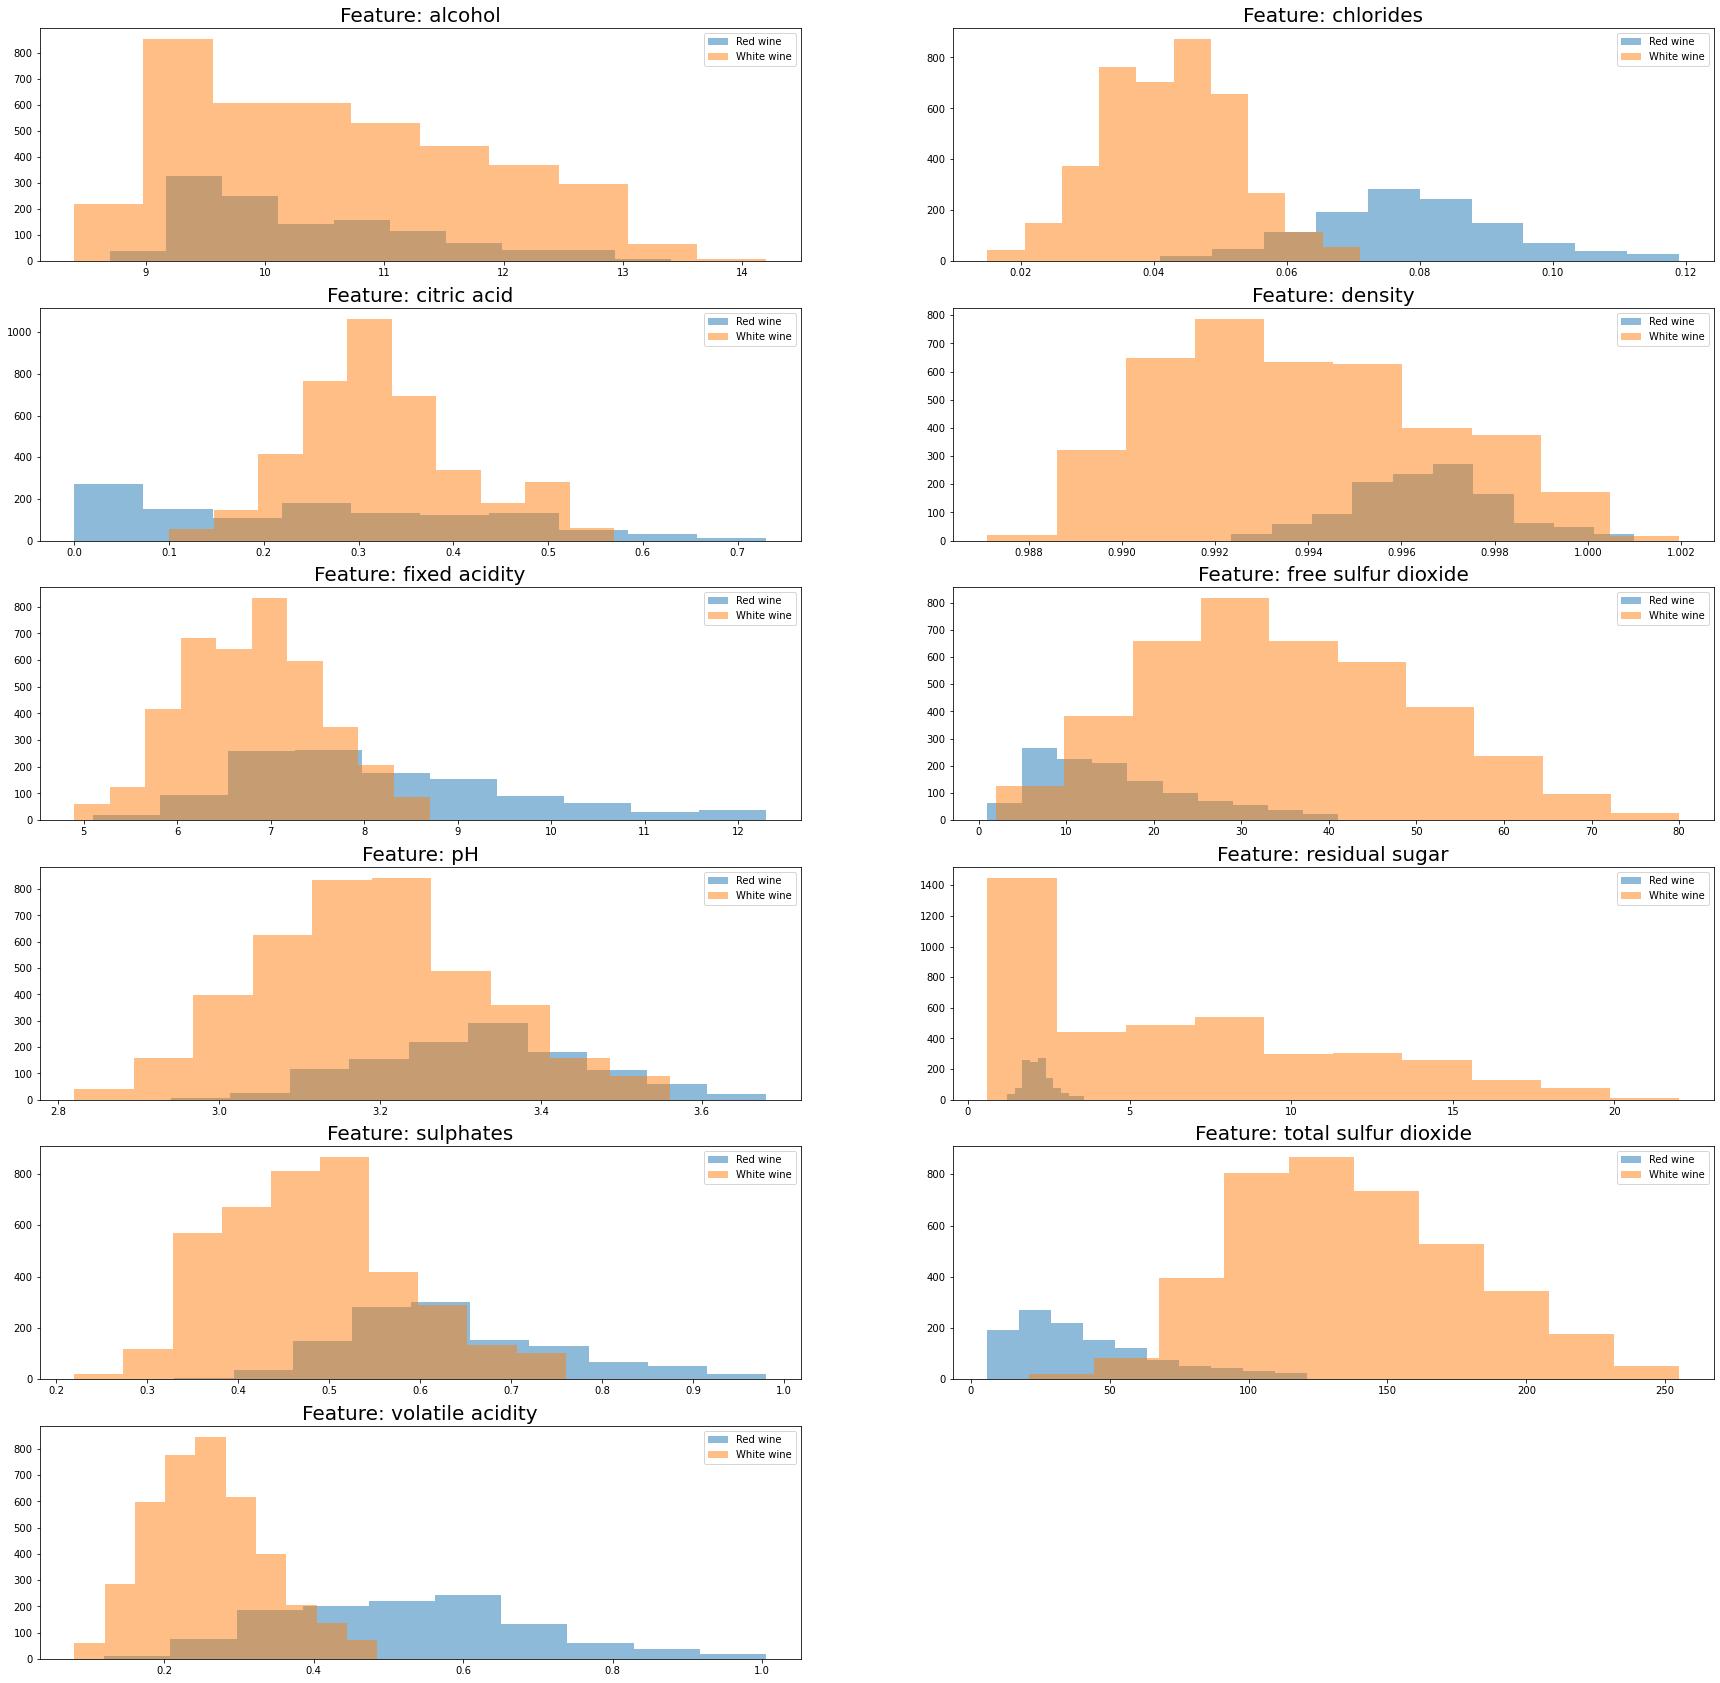

In [39]:
# 설명변수 선정
x = df[df.columns.difference(['target'])]
# 설명변수명 리스트
feature_name = x.columns
plt.figure(figsize=(30, 30))
for col_idx in range(len(feature_name)):
    # 6행 2열 서브플롯에 각 feature 박스플롯 시각화
    plt.subplot(6, 2, col_idx+1)
    # 레드 와인에 해당하는 데이터 histogram 시각화
    plt.hist(df[df["target"] == 0][feature_name[col_idx]], label = "Red wine", alpha = 0.5)
    # 화이트 와인에 해당하는 데이터 histogram 시각화
    plt.hist(df[df["target"] == 1][feature_name[col_idx]], label = "White wine", alpha = 0.5)
    plt.legend()
    # 그래프 타이틀: feature name
    plt.title("Feature: "+ feature_name[col_idx], fontsize = 20)
plt.savefig('../figure/relationship.png')
plt.show()

- 겹치는 부분이 적은alcohol, PH 변수는 와인구별에 어려움을 겪는다.

In [40]:
# 표준 스케일러(평균 0, 분산 1)
scaler = StandardScaler()
# 설명변수 및 목표변수 분리
x = df[df.columns.difference(['target'])]
y = df['target']
# 설명변수 데이터 스케일링
x_scaled = scaler.fit_transform(x)

In [42]:
# 학습, 테스트 데이터셋 7:3 비율로 분리
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, 
                                                    test_size = 0.3, random_state = 123)

In [43]:
# 훈련 데이터 내 와인별 비율
y_train.value_counts(normalize=True)

1    0.767006
0    0.232994
Name: target, dtype: float64

In [44]:
# 테스트 데이터 내 와인별 비율
y_test.value_counts(normalize=True)

1    0.779062
0    0.220938
Name: target, dtype: float64

In [46]:
def modeling_uncustomized (algorithm, x_train, y_train, x_test, y_test):
    # 하이퍼파라미터 조정 없이 모델 학습
    uncustomized = algorithm(random_state=1234)
    uncustomized.fit(x_train, y_train)
    # Train Data 설명력
    train_score_before = uncustomized.score(x_train, y_train).round(3)
    print(f"학습 데이터셋 정확도: {train_score_before}")
    # Test Data 설명력
    test_score_before = uncustomized.score(x_test, y_test).round(3)
    print(f"테스트 데이터셋 정확도: {test_score_before}")
    return train_score_before, test_score_before

- 기본 모델링 함수 : 하이퍼파라미터 튜닝 없이 모델 학습, 성능 평가하는 함수

In [47]:
def optimi_visualization(algorithm_name, x_values, train_score, test_score, xlabel, filename):
    # 하이퍼파라미터 조정에 따른 학습 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, train_score, linestyle = '-', label = 'train score')
    # 하이퍼파라미터 조정에 따른 테스트 데이터셋 기반 모델 성능 추이 시각화
    plt.plot(x_values, test_score, linestyle = '--', label = 'test score')
    plt.ylabel('Accuracy(%)') # y축 라벨
    plt.xlabel(xlabel) # x축 라벨
    plt.legend() # 범례표시

- 하이퍼파라미터별 모델 성능 시각화 함수

In [48]:
def optimi_estimator(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_estimator_min, n_estimator_max):
    train_score = []; test_score =[]
    para_n_tree = [n_tree*5 for n_tree in range(n_estimator_min, n_estimator_max)]

    for v_n_estimators in para_n_tree:
        model = algorithm(n_estimators = v_n_estimators, random_state=1234)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 트리 개수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'n_estimators': para_n_tree, 'TrainScore': train_score, 'TestScore': test_score})
    # 트리 개수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_n_tree, train_score, test_score, "The number of estimator", "n_estimator")
    print(round(df_score_n, 4))

- 모델 최적화 함수 : 학습할 트리 모델 개수 선정

In [50]:
def optimi_maxdepth (algorithm, algorithm_name, x_train, y_train, x_test, y_test, depth_min, depth_max, n_estimator):
    train_score = []; test_score = []
    para_depth = [depth for depth in range(depth_min, depth_max)]

    for v_max_depth in para_depth:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(max_depth = v_max_depth,
                              random_state=1234)
        else:
            model = algorithm(max_depth = v_max_depth,
                              n_estimators = n_estimator,
                              random_state=1234)
        
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 최대 깊이에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'depth': para_depth, 'TrainScore': train_score, 'TestScore': test_score})
    # 최대 깊이에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_depth, train_score, test_score, "The number of depth", "n_depth")
    print(round(df_score_n, 4))

- 모델 최적화 함수 : 최대 깊이 선정

In [51]:
def optimi_minsplit (algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_split_min, n_split_max, n_estimator, n_depth):
    train_score = []; test_score = []
    para_split = [n_split*2 for n_split in range(n_split_min, n_split_max)]
    for v_min_samples_split in para_split:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(min_samples_split = v_min_samples_split,
                              max_depth = n_depth,
                              random_state = 1234)
        else:
            model = algorithm(min_samples_split = v_min_samples_split,
                              n_estimators = n_estimator,
                              max_depth = n_depth,
                              random_state = 1234)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 분리 노드의 최소 자료 수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'min_samples_split': para_split, 'TrainScore': train_score, 'TestScore': test_score})
    # 분리 노드의 최소 자료 수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_split, train_score, test_score, "The minimum number of samples required to split an internal node", "min_samples_split")
    print(round(df_score_n, 4))

- 모델 최적화 함수 : 분리노드의 최소 자료 수 선정

In [52]:
def optimi_minleaf(algorithm, algorithm_name, x_train, y_train, x_test, y_test, n_leaf_min, n_leaf_max, n_estimator, n_depth, n_split):
    train_score = []; test_score = []
    para_leaf = [n_leaf*2 for n_leaf in range(n_leaf_min, n_leaf_max)]

    for v_min_samples_leaf in para_leaf:
        # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
        if algorithm == DTC:
            model = algorithm(min_samples_leaf = v_min_samples_leaf,
                                        max_depth = n_depth,
                                        min_samples_split = n_split,
                                        random_state=1234)
        else:
            model = algorithm(min_samples_leaf = v_min_samples_leaf,
                                n_estimators = n_estimator,
                                max_depth = n_depth,
                                min_samples_split = n_split,
                                random_state=1234)
        model.fit(x_train, y_train)
        train_score.append(model.score(x_train, y_train))
        test_score.append(model.score(x_test, y_test))

    # 잎사귀 노드의 최소 자료 수에 따른 모델 성능 저장
    df_score_n = pd.DataFrame({'min_samples_leaf': para_leaf, 'TrainScore': train_score, 'TestScore': test_score})
    # 잎사귀 노드의 최소 자료 수에 따른 모델 성능 추이 시각화 함수 호출
    optimi_visualization(algorithm_name, para_leaf, train_score, test_score, "The minimum number of samples required to be at a leaf node", "min_samples_leaf")
    print(round(df_score_n, 4))

- 모델 최적화 함수 : 잎사귀 노드의 최소 자료 수 선정

In [69]:
def model_final(algorithm, algorithm_name, feature_name, x_train, y_train, x_test, y_test, n_estimator, n_depth, n_split, n_leaf):
    # 의사결정나무 모델의 경우 트리 개수를 따로 설정하지 않기 때문에 RFC, GBC와 분리하여 모델링
    if algorithm == DTC:
        model = algorithm(random_state=1234, 
                          min_samples_leaf = n_leaf,
                          min_samples_split = n_split, 
                          max_depth = n_depth)
    else:
        model = algorithm(random_state = 1234, 
                          n_estimators = n_estimator, 
                          min_samples_leaf = n_leaf,
                          min_samples_split = n_split, 
                          max_depth = n_depth)
    # 모델 학습
    model.fit(x_train, y_train)

    
    # 최종 모델의 성능 평가
    train_acc = model.score(x_train, y_train)
    test_acc = model.score(x_test, y_test)
    y_pred = model.predict(x_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}") # 정확도
    print(f"Precision: {precision_score(y_test, y_pred):.3f}") # 정밀도
    print(f"Recall: {recall_score(y_test, y_pred):.3f}") # 재현율
    print(f"F1-score: {f1_score(y_test, y_pred):.3f}") # F1 스코어
    
    # 혼동행렬 시각화
    plt.figure(figsize =(30, 30))
    plot_confusion_matrix(model, 
                         x_test, y_test,
                         include_values = True,
                         display_labels = ['Red', 'White'], # 목표변수 이름
                         cmap = 'Pastel1') # 컬러맵
    plt.show()
    
    # 변수 중요도 산출
    dt_importance = pd.DataFrame()
    dt_importance['Feature'] = feature_name # 설명변수 이름
    dt_importance['Importance'] = model.feature_importances_ # 설명변수 중요도 산출

    # 변수 중요도 내림차순 정렬
    dt_importance.sort_values("Importance", ascending = False, inplace = True)
    print(dt_importance.round(3))
    # 변수 중요도 오름차순 정렬
    dt_importance.sort_values("Importance", ascending = True, inplace = True)
    # 변수 중요도 시각화
    coordinates = range(len(dt_importance)) # 설명변수 개수만큼 bar 시각화
    plt.barh(y = coordinates, width = dt_importance["Importance"])
    plt.yticks(coordinates, dt_importance["Feature"]) # y축 눈금별 설명변수 이름 기입
    plt.xlabel("Feature Importance") # x축 이름
    plt.ylabel("Features") # y축 이름

- 최종 모델 학습

In [54]:
# 랜덤포레스트 분류 알고리즘
algorithm = RFC
algorithm_name = 'rfc'

In [55]:
train_acc_before, test_acc_before = modeling_uncustomized(algorithm, 
                                                          x_train,
                                                          y_train,
                                                          x_test,
                                                          y_test)

학습 데이터셋 정확도: 1.0
테스트 데이터셋 정확도: 0.999


    n_estimators  TrainScore  TestScore
0              5         1.0     0.9961
1             10         1.0     0.9974
2             15         1.0     0.9974
3             20         1.0     0.9981
4             25         1.0     0.9981
5             30         1.0     0.9987
6             35         1.0     0.9987
7             40         1.0     0.9987
8             45         1.0     0.9987
9             50         1.0     0.9987
10            55         1.0     0.9987
11            60         1.0     0.9987
12            65         1.0     0.9987
13            70         1.0     0.9987
14            75         1.0     0.9987
15            80         1.0     0.9987
16            85         1.0     0.9987
17            90         1.0     0.9987
18            95         1.0     0.9987
19           100         1.0     0.9987
20           105         1.0     0.9987
21           110         1.0     0.9987
22           115         1.0     0.9987
23           120         1.0     0.9987


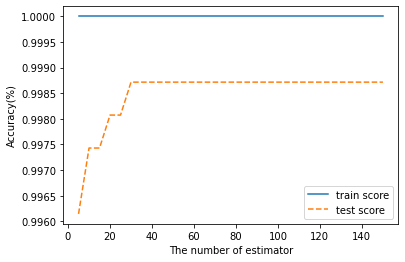

In [56]:
n_estimator_min = 1
n_estimator_max = 31
optimi_estimator(algorithm, algorithm_name, 
                 x_train, y_train, x_test, y_test, 
                 n_estimator_min, n_estimator_max)

- 모델최적화 (1) : 학습할 트리 개수 선정
- train score의 점수가 만점이라서 과적합이 나타난다.

In [57]:
n_estimator = 30

    depth  TrainScore  TestScore
0       1      0.9727     0.9698
1       2      0.9917     0.9878
2       3      0.9981     0.9968
3       4      0.9986     0.9974
4       5      0.9992     0.9968
5       6      0.9994     0.9987
6       7      0.9997     0.9981
7       8      0.9997     0.9981
8       9      1.0000     0.9987
9      10      1.0000     0.9987
10     11      1.0000     0.9987
11     12      1.0000     0.9987
12     13      1.0000     0.9987
13     14      1.0000     0.9987
14     15      1.0000     0.9987
15     16      1.0000     0.9987
16     17      1.0000     0.9987
17     18      1.0000     0.9987
18     19      1.0000     0.9987
19     20      1.0000     0.9987


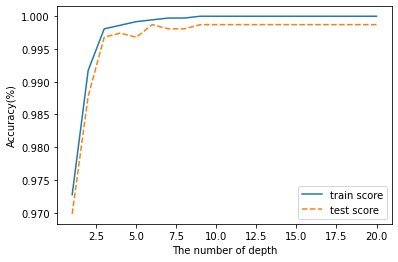

In [58]:
depth_min = 1
depth_max = 21
optimi_maxdepth(algorithm, algorithm_name, 
                x_train, y_train, x_test, y_test, 
                depth_min, depth_max, n_estimator)

- 모델 최적화 (2) : 최대 깊이 

In [60]:
n_depth = 6

    min_samples_split  TrainScore  TestScore
0                   2      0.9994     0.9987
1                   4      0.9994     0.9987
2                   6      0.9994     0.9987
3                   8      0.9994     0.9981
4                  10      0.9994     0.9981
5                  12      0.9994     0.9987
6                  14      0.9994     0.9987
7                  16      0.9994     0.9987
8                  18      0.9994     0.9987
9                  20      0.9994     0.9987
10                 22      0.9994     0.9987
11                 24      0.9994     0.9987
12                 26      0.9994     0.9987
13                 28      0.9994     0.9987
14                 30      0.9992     0.9987
15                 32      0.9992     0.9987
16                 34      0.9992     0.9987
17                 36      0.9992     0.9981
18                 38      0.9992     0.9981
19                 40      0.9992     0.9987
20                 42      0.9992     0.9987
21        

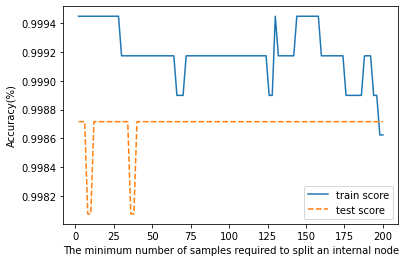

In [61]:
n_split_min = 1
n_split_max = 101
# 데이터프레임 행 최대 100개까지 반드시 출력
pd.set_option('display.max_row', 100)
optimi_minsplit (algorithm, algorithm_name,
                 x_train, y_train, x_test, y_test,
                 n_split_min, n_split_max, n_estimator, n_depth)

- 모델 최적화 (3): 분리노드의 최소 자료 수

In [67]:
n_split = 66

    min_samples_leaf  TrainScore  TestScore
0                  2      0.9989     0.9987
1                  4      0.9986     0.9981
2                  6      0.9983     0.9981
3                  8      0.9983     0.9981
4                 10      0.9983     0.9974
5                 12      0.9986     0.9974
6                 14      0.9986     0.9974
7                 16      0.9986     0.9981
8                 18      0.9983     0.9981
9                 20      0.9983     0.9981
10                22      0.9975     0.9981
11                24      0.9972     0.9968
12                26      0.9972     0.9961
13                28      0.9970     0.9961
14                30      0.9967     0.9968
15                32      0.9967     0.9968
16                34      0.9967     0.9968
17                36      0.9964     0.9968
18                38      0.9961     0.9961
19                40      0.9964     0.9955
20                42      0.9964     0.9955
21                44      0.9964

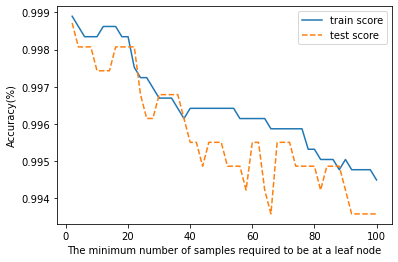

In [63]:
n_leaf_min = 1
n_leaf_max = 51
optimi_minleaf(algorithm, algorithm_name, 
               x_train, y_train, x_test, y_test, 
               n_leaf_min, n_leaf_max, n_estimator, n_depth, n_split)

- 모델최적화 (4) : 잎사귀 노드의 최소 자료 수

In [66]:
n_leaf = 20

- 최적의 파라미터 : 트리개수 30. 깊이 6, 분리 노드의 최소 자료 수 66, 잎사귀 노드의 최소 자료 수 20

Accuracy: 0.998
Precision: 0.999
Recall: 0.998
F1-score: 0.999


<Figure size 2160x2160 with 0 Axes>

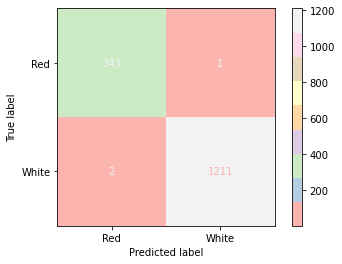

                 Feature  Importance
1              chlorides       0.308
9   total sulfur dioxide       0.270
10      volatile acidity       0.158
7         residual sugar       0.092
3                density       0.080
4          fixed acidity       0.041
5    free sulfur dioxide       0.027
8              sulphates       0.014
6                     pH       0.004
2            citric acid       0.004
0                alcohol       0.000


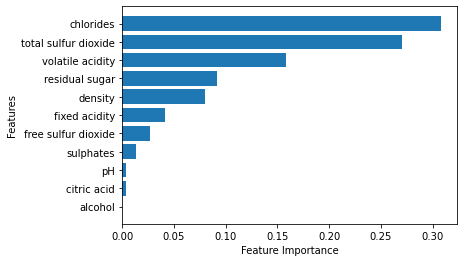

In [70]:
model_final(algorithm, algorithm_name, feature_name,
            x_train, y_train, x_test, y_test,
            n_estimator, n_depth, n_split, n_leaf)